# Evaluating Model Using Vector Similarity Scores

### Imports

In [1]:
import sys
import pandas as pd
sys.path.append("..")
import seaborn as sns
import nltk
import matplotlib.pyplot as plt

from humor.vector_similarity_metric import vector_similarity_metric

/home/ada/humor/.venv/lib/python3.8/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [2]:
ground_truth = pd.read_csv('/home/ada/humor/data/stand_up_dataset/standup_data.csv')
gemma = pd.read_csv('/home/ada/humor/data/stand_up_dataset/gemma_answers.csv')
phi_model = pd.read_csv("/home/ada/humor/data/stand_up_dataset/phi3_mini_quotes.csv")
gemma2 = pd.read_csv("/home/ada/humor/data/stand_up_dataset/gemma2 - gemma2.csv")
llama = pd.read_csv("/home/ada/humor/data/stand_up_dataset/llama - llama.csv")

### Experiment

In [3]:
gemma_metric = vector_similarity_metric(gemma, ground_truth)
print("Gemma Model:", gemma_metric.select_dtypes(include='number').mean())

phi_metric = vector_similarity_metric(phi_model, ground_truth)
print("Phi Model:", phi_metric.select_dtypes(include='number').mean())

gemma2_metric = vector_similarity_metric(gemma2, ground_truth)
print("Gemma2 Model:", gemma2_metric.select_dtypes(include='number').mean())

llama_metric = vector_similarity_metric(llama, ground_truth)
print("Llama Model:",llama_metric.select_dtypes(include='number').mean())

Gemma Model: score    30.00032
dtype: float64
Phi Model: score    25.762219
dtype: float64
Gemma2 Model: score    35.863432
dtype: float64
Llama Model: score    33.846099
dtype: float64


<Figure size 500x500 with 0 Axes>

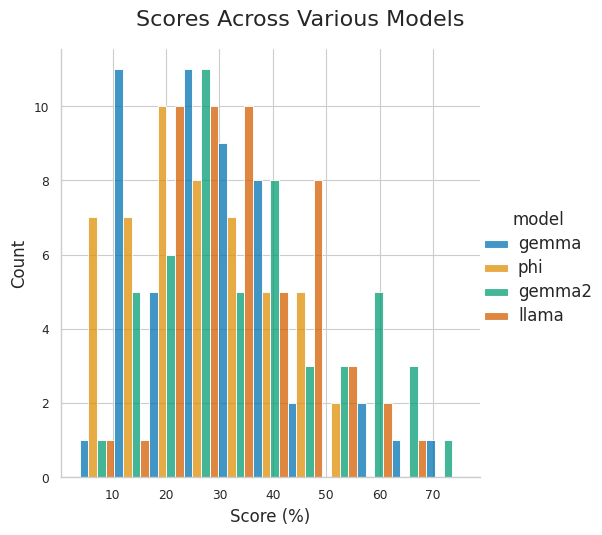

In [4]:
gemma = gemma_metric.assign(model="gemma")
phi = phi_metric.assign(model="phi")
gemma2 = gemma2_metric.assign(model = "gemma2")
llama = llama_metric.assign(model = "llama")

sns.set_style("whitegrid")
sns.set_context("paper")
plt.figure(figsize=(5, 5))  
sns.set_palette("colorblind")

df = pd.concat([gemma, phi, gemma2, llama]).reset_index(drop=True)
plot = sns.displot(df, x="score", hue="model", kind="hist", shrink=1, multiple="dodge")
plot.fig.suptitle("Scores Across Various Models", fontsize=16, y=1.05)
plot.set_axis_labels("Score (%)", "Count", fontsize=12)

plot._legend.get_title().set_fontsize(12) 
for text in plot._legend.texts:
    text.set_fontsize(12) 
plot.savefig("experiment_13.png")
plt.show()